# 📰✨ Fake News Detection Using NLP ✨📰

Welcome to the **Fake News Detection** project! This notebook will guide you through the process of building an NLP model to detect fake news using various machine learning techniques. 🚀

---

## 📚 Libraries Used 📚

- 🐼 `pandas` for data manipulation
- 🔢 `numpy` for numerical operations
- 🌿 `nltk` for natural language processing
  - `PorterStemmer`
  - `stopwords`
- 🎲 `scikit-learn` for machine learning
  - `train_test_split`
  - `cross_val_score`
  - `GridSearchCV`
  - `RandomForestClassifier`
  - `AdaBoostClassifier`
  - `GradientBoostingClassifier`
  - `VotingClassifier`
  - `StackingClassifier`
  - `LogisticRegression`
  - `DecisionTreeClassifier`
- 🚀 `xgboost` for XGBClassifier
- ✅ `sklearn.metrics` for evaluation metrics
  - `accuracy_score`
  - `precision_score`
- ☁️ `wordcloud` for visualizing word frequencies
- 📊 `matplotlib` for plotting
- 🌊 `seaborn` for enhanced data visualization
- 🔍 `re` for regular expressions
- 🧮 `collections.Counter` for counting word frequencies
- 🧠 `sklearn.feature_extraction.text.TfidfVectorizer` for text vectorization
- 🛠️ `joblib` for model persistence
- 🚫 `warnings` to ignore warnings

---

## 📝 Steps in the Project 📝

1. **📂 Data Loading and Exploration**
   - Load the dataset using `pandas`
   - Explore the data for initial insights

2. **🔍 Data Preprocessing**
   - Clean the text data using `re`
   - Remove stopwords using `nltk`
   - Apply stemming using `PorterStemmer`

3. **🔢 Feature Engineering**
   - Vectorize the text data using `TfidfVectorizer`

4. **🔀 Train-Test Split**
   - Split the data into training and testing sets using `train_test_split`

5. **🤖 Model Building**
   - Initialize various classifiers:
     - `RandomForestClassifier`
     - `AdaBoostClassifier`
     - `GradientBoostingClassifier`
     - `VotingClassifier`
     - `StackingClassifier`
     - `LogisticRegression`
     - `DecisionTreeClassifier`
     - `XGBClassifier`
   - Train the models on the training data
   - Perform cross-validation using `cross_val_score`

6. **🧪 Hyperparameter Tuning**
   - Use `GridSearchCV` for tuning hyperparameters of the models

7. **✅ Model Evaluation**
   - Evaluate the models using:
     - `accuracy_score`
     - `precision_score`

8. **📈 Visualization**
   - Visualize the results using `matplotlib` and `seaborn`
   - Create word clouds using `WordCloud`

9. **💾 Model Saving**
   - Save the best model using `joblib`

---

In [3]:
import pandas as pd
import numpy as np
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score
from wordcloud import WordCloud
import matplotlib.pyplot as mp
import seaborn as sn
import re as r
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib as j
import warnings as w
w.filterwarnings('ignore')


# 📂 Data Loading and Initial Exploration

In this section, we will load the dataset and perform initial exploration to understand its structure and contents. 📊

---

### 🔄 Data Loading

- 📥 We load the dataset using `pandas` with `pd.read_csv('train.csv')`.
- 👀 Display the first row of the dataset to get an initial look at the data.

### 🏷️ Dataset Overview

- 🔢 Display the shape of the dataset using `df.shape` to see the number of rows and columns.
- 🧾 Use `df.info()` to get a concise summary of the dataset, including the data types and the count of non-null values for each column.

### 🔍 Handling Missing Values

- 🛠️ Fill any missing values in the dataset with a space (" ") using `df=df.fillna(" ")`.
- 🔄 Re-check the dataset summary with `df.info()` to confirm that there are no more missing values.

### 🔎 Examining Sample Data

- 📋 Display the `title` and `text` of the first article in the dataset to understand the content and format of the text data.

---

### 📋 Initial Data Analysis

- 📊 The dataset consists of 20,800 entries and 5 columns: `id`, `title`, `author`, `text`, and `label`.
- ❌ Columns `title`, `author`, and `text` contain some missing values, which have been filled with a space (" ").
- 🏷️ The `label` column indicates whether the news is real (0) or fake (1).

#### 📰 Sample Article Analysis

- 🖊️ **Title**: 'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'
- 📄 **Text**: This article discusses the reaction of House Democrats to a tweet by Jason Chaffetz regarding an FBI letter about Hillary Clinton's email server.

---

By following these steps, we have successfully loaded and explored the dataset, handled missing values, and examined the structure and content of the data. 🚀


In [4]:
df=pd.read_csv('train.csv')

In [5]:
df.head(1)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1


In [6]:
df.shape

(20800, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [8]:
df=df.fillna(" ")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  20800 non-null  object
 3   text    20800 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [10]:
df.shape

(20800, 5)

In [11]:
df.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [12]:
df['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [13]:
df['text'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [14]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


# 📝 Data Preprocessing

In this section, we will preprocess the data to create a new feature and clean up the dataset for further analysis. 🔧

---

### ➕ Feature Engineering

- ✨ Create a new column `news` by combining the `author` and `text` columns.
  - **Example**: For the first row, the `news` column will contain the combined content of `author` and `text`.

### 📋 Data Inspection

- 👀 Display the first 3 rows of the dataset to check the new `news` column.

### 🗑️ Dropping Unnecessary Columns

- 🧹 Drop the `id`, `title`, `author`, and `text` columns as they are no longer needed.
- 👀 Display the first 3 rows of the dataset again to confirm the changes.

### 🔢 Data Validation

- 📏 Calculate the length of the `news` text in the first row to ensure the content has been combined correctly.
  - **Example**: The length of the `news` text in the first row is 4944 characters.

---

By following these steps, we have successfully created a new feature by combining relevant columns and cleaned up the dataset for further analysis. 🚀


In [15]:
df['news']=df['author']+" "+df['text']

In [16]:
df['news']

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn Ever get the feeling your life...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss Videos 15 Civilians Killed In ...
4        Howard Portnoy Print \nAn Iranian woman has be...
                               ...                        
20795    Jerome Hudson Rapper T. I. unloaded on black c...
20796    Benjamin Hoffman When the Green Bay Packers lo...
20797    Michael J. de la Merced and Rachel Abrams The ...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799    David Swanson   David Swanson is an author, ac...
Name: news, Length: 20800, dtype: object

In [17]:
df.head(3)

,id,title,author,text,label,news
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,Daniel J. Flynn Ever get the feeling your life...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...


In [18]:
df.drop(['id','title','author','text'],axis=1,inplace=True)

In [19]:
df.head(3)

,label,news
0,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,0,Daniel J. Flynn Ever get the feeling your life...
2,1,Consortiumnews.com Why the Truth Might Get You...


In [20]:
len(df['news'][0])

4944

# 📝 Data Preprocessing and Cleaning

In this section, we will further preprocess the data by removing stopwords, performing stemming, and visualizing the data distribution. 🔧

---

### 🔍 Removing Stopwords

- ✂️ **Remove Stopwords**: Define a function to remove stopwords from the `news` column.
  - **Purpose**: Clean the text by removing common words that do not contribute much to the meaning, like 'the', 'is', 'in', etc.

### 🧼 Cleaning Text Data

- 🧹 **Apply Stopwords Removal**: Apply the stopword removal function to the `news` column.
  - **Example**: For the first row, the length of the `news` text reduces from 4944 to 3688 characters.

### 📝 Text Normalization

- 🧽 **Regular Expressions for Cleaning**: Use regular expressions to remove any characters that are not letters or numbers.
  - **Purpose**: Ensure the text is clean and standardized.
  
- 🔄 **Replace Multiple Spaces**: Replace multiple spaces with a single space for better readability and consistency.

### 🔄 Stemming

- 🌱 **Stemming Words**: Define and apply a stemming function to the `news` column.
  - **Purpose**: Reduce words to their base or root form to standardize different forms of the same word.

### 📊 Data Visualization

- 📉 **Histogram of Labels**: Plot a histogram to visualize the distribution of the `label` column.
  - **Purpose**: Understand the balance between the classes in the dataset.

### 🔍 Filtering and Aggregating Text Data

- 🔍 **Filter by Label**: Filter the dataframe to include only rows where the `label` is 1.
- 📝 **Aggregate Text**: Concatenate all the `news` texts into a single string for further analysis.
  - **Purpose**: Prepare the text data for visualization or word cloud generation.

---

By following these steps, we have successfully removed stopwords, cleaned the text, performed stemming, visualized the label distribution, and prepared the text data for further analysis. 🚀


In [21]:
st=stopwords.words('english')
def removing_stopwords(x):
    m=[]
    t=x.split(' ')
    for i in t:
        if i not in st:
            m.append(i.lower())
    return " ".join(m)        
            
            


        
  


In [22]:
df['news']=df['news'].apply(removing_stopwords)

In [23]:
df.head(2)

,label,news
0,1,darrell lucus house dem aide: we didn’t even s...
1,0,daniel j. flynn ever get feeling life circles ...


In [24]:
len(df['news'][0])

3688

In [72]:
df['news'][1]

'daniel j  flynn ever get feel life circl roundabout rather head straight line toward intend destin hillari clinton remain big woman campu leafi  liber wellesley  massachusett  everywher els vote like inaugur dress remaind day way miss havisham forev wore wed dress speak great expect  hillari rodham overflow 48 year ago first address wellesley graduat class  the presid colleg inform gather 1969 student need  no debat far i could ascertain spokesman be kind like democrat primari 2016 minu term unknown even seven sister school  i glad miss adam made clear i speak today us  400 us miss rodham told classmat  after appoint edger bergen charli mccarthi mortim snerd attend   bespectacl granni glass  award matronli wisdom  least john lennon wisdom  took issu previou speaker  despit becom first win elect seat u  s  senat sinc reconstruct  edward brook came critic call  empathi  goal protestor critic tactic  though clinton senior thesi saul alinski lament  black power demagogu elitist arrog repr

In [26]:
df['news']=df['news'].apply(lambda x: r.sub('[^a-zA-Z0-9]',' ',x))

In [27]:
df['news']=df['news'].apply(lambda x: x.replace("   "," "))

In [28]:
df['news'][0]

'darrell lucus house dem aide  we didn t even see comey s letter until jason chaffetz tweeted it by darrell lucus october 30  2016 subscribe jason chaffetz stump american fork  utah image courtesy michael jolley  available creative commons by license with apologies keith olbermann  doubt worst person the world week fbi director james comey  but according house democratic aide  looks like also know second worst person well  it turns comey sent now infamous letter announcing fbi looking emails may related hillary clinton s email server  ranking democrats relevant committees didn t hear comey  they found via tweet one republican committee chairmen as know  comey notified republican chairmen democratic ranking members house intelligence  judiciary  oversight committees agency reviewing emails recently discovered order see contained classified information  not long letter went out  oversight committee chairman jason chaffetz set political world ablaze tweet  fbi dir informed me the fbi lear

In [29]:
pt=PorterStemmer()
def stemm(x):
    t=[]
    m=x.split(' ')
    for i in m:
        t.append(pt.stem(i))
    return " ".join(t)    


In [30]:
df['news']=df['news'].apply(stemm)

In [31]:
df['news'][0]

'darrel lucu hous dem aid  we didn t even see comey s letter until jason chaffetz tweet it by darrel lucu octob 30  2016 subscrib jason chaffetz stump american fork  utah imag courtesi michael jolley  avail creativ common by licens with apolog keith olbermann  doubt worst person the world week fbi director jame comey  but accord hous democrat aid  look like also know second worst person well  it turn comey sent now infam letter announc fbi look email may relat hillari clinton s email server  rank democrat relev committe didn t hear comey  they found via tweet one republican committe chairmen as know  comey notifi republican chairmen democrat rank member hous intellig  judiciari  oversight committe agenc review email recent discov order see contain classifi inform  not long letter went out  oversight committe chairman jason chaffetz set polit world ablaz tweet  fbi dir inform me the fbi learn exist email appear pertin investig case reopen  jason chaffetz jasoninthehous  octob 28  2016  

In [32]:
df.head(1)

,label,news
0,1,darrel lucu hous dem aid we didn t even see c...


<Axes: xlabel='label', ylabel='Count'>

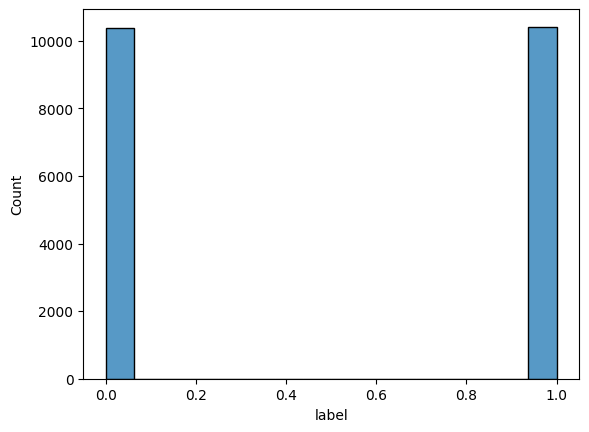

In [33]:
sn.histplot(df['label'])

In [34]:
filter_df=df[df['label']==1]
all_text = ' '.join(filter_df['news'].astype(str).tolist())


# 🌟 Visualizing Word Clouds

In this section, we will generate and visualize word clouds for the text data labeled as fake news and real news. 🖼️

---

### 🌩️ Generate Word Cloud for Fake News

- 🗂️ **Extract Words**: Split the aggregated text data into individual words.
  - **Purpose**: Prepare the data for word cloud generation.

- ☁️ **Generate Word Cloud**: Create a word cloud using the words from the fake news.
  - **Visualization**: Generate a word cloud image with a white background.

- 🎨 **Display Word Cloud**: Plot and display the word cloud.
  - **Purpose**: Visualize the most frequent words in the fake news dataset.

### 🌩️ Generate Word Cloud for Real News

- 🗂️ **Extract Words**: Split the aggregated text data into individual words for real news.
  - **Purpose**: Prepare the data for word cloud generation.

- ☁️ **Generate Word Cloud**: Create a word cloud using the words from the real news.
  - **Visualization**: Generate a word cloud image with a white background.

- 🎨 **Display Word Cloud**: Plot and display the word cloud.
  - **Purpose**: Visualize the most frequent words in the real news dataset.

---

By following these steps, we have successfully generated and visualized word clouds for both fake news and real news, providing a clear representation of the most frequent words in each category. 🌐


In [35]:
words = [word for word in all_text.split()]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))



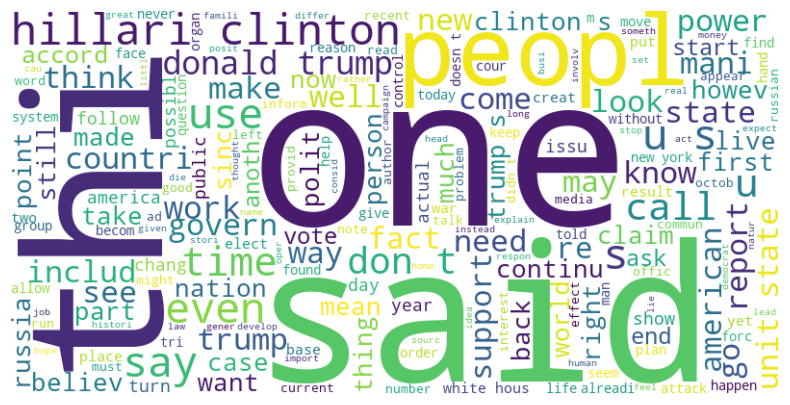

In [36]:
mp.figure(figsize=(10, 5))
mp.imshow(wordcloud, interpolation='bilinear')
mp.axis('off')
mp.show()

In [37]:
filter_df=df[df['label']==0]
all_text = ' '.join(filter_df['news'].astype(str).tolist())


In [38]:
words = [word for word in all_text.split()]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))



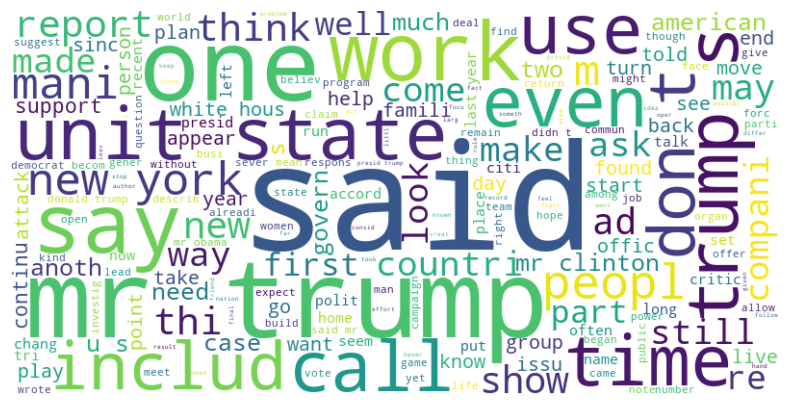

In [39]:
mp.figure(figsize=(10, 5))
mp.imshow(wordcloud, interpolation='bilinear')
mp.axis('off')
mp.show()

# 📝 **Data Preprocessing and Splitting** 📊

## 🚀 **Introduction**
In this section, we preprocess the text data and prepare it for machine learning. This involves transforming the text into numerical features and splitting the dataset into training and test sets.

## 🔢 **Step-by-Step Process**

### 1. **Extracting Data** 🗂️
We start by extracting the text and label data from our DataFrame.

- 🗞️ `x` represents the text data from the 'news' column.
- 🏷️ `y` represents the labels from the 'label' column.

### 2. **Text Vectorization** 🧩
Next, we use `TfidfVectorizer` to convert the text data into numerical features.

- 🔢 `TfidfVectorizer` transforms the text into a matrix of TF-IDF features.
- 💾 The transformed data is stored in `x`, which is now a sparse matrix with TF-IDF values.

### 3. **Splitting Data** 📉
We then split the dataset into training and test sets.

- 🎯 The training set (`x_train`, `y_train`) is used to train the model.
- 🧪 The test set (`x_test`, `y_test`) is used to evaluate the model's performance.
- 📊 `test_size=0.2` indicates that 20% of the data is reserved for testing.
- 🔄 `random_state=42` ensures that the split is reproducible.

### 4. **Checking Data Shapes** 📏
Finally, we examine the shapes of the resulting datasets to understand their structure.

- 📐 `x_train` has a shape of (16,640 samples, 115,291 features).
- 📐 `y_train` has a shape of (16,640 samples).
- 📐 `x_test` has a shape of (4,160 samples, 115,291 features).
- 📐 `y_test` has a shape of (4,160 samples).

## ✅ **Summary**
We have successfully transformed our text data into numerical features and split the dataset into training and test sets, setting the stage for model training and evaluation.


In [40]:
x=df['news'].values
y=df['label'].values

In [41]:
x

array(['darrel lucu hous dem aid  we didn t even see comey s letter until jason chaffetz tweet it by darrel lucu octob 30  2016 subscrib jason chaffetz stump american fork  utah imag courtesi michael jolley  avail creativ common by licens with apolog keith olbermann  doubt worst person the world week fbi director jame comey  but accord hous democrat aid  look like also know second worst person well  it turn comey sent now infam letter announc fbi look email may relat hillari clinton s email server  rank democrat relev committe didn t hear comey  they found via tweet one republican committe chairmen as know  comey notifi republican chairmen democrat rank member hous intellig  judiciari  oversight committe agenc review email recent discov order see contain classifi inform  not long letter went out  oversight committe chairman jason chaffetz set polit world ablaz tweet  fbi dir inform me the fbi learn exist email appear pertin investig case reopen  jason chaffetz jasoninthehous  octob 28 

In [42]:
y

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [43]:
word_vector=TfidfVectorizer()

In [44]:
x=word_vector.fit_transform(x)

In [45]:
x

<20800x115291 sparse matrix of type '<class 'numpy.float64'>'
	with 5604244 stored elements in Compressed Sparse Row format>

In [46]:
print(x)

  (0, 26870)	0.26339341117908194
  (0, 61713)	0.15302117711995525
  (0, 48217)	0.08377686707094752
  (0, 27910)	0.06749176201075023
  (0, 5812)	0.0992692862614853
  (0, 110743)	0.021741003645989125
  (0, 29217)	0.12651234181615972
  (0, 35404)	0.04361433030773412
  (0, 91235)	0.03843816381784151
  (0, 23104)	0.25863437668593403
  (0, 59811)	0.15529798692285562
  (0, 106930)	0.02884899655943256
  (0, 52744)	0.14430880013368058
  (0, 20298)	0.5714554630222767
  (0, 104973)	0.11683297731985497
  (0, 52060)	0.03396375504452872
  (0, 18138)	0.03229915173223909
  (0, 73766)	0.03595570094183976
  (0, 1892)	0.03723164326242023
  (0, 1369)	0.02594382022166253
  (0, 98188)	0.028747849768359778
  (0, 97973)	0.037645518759718145
  (0, 7305)	0.012165013821627439
  (0, 38701)	0.04045809641714793
  (0, 107390)	0.06726418031374827
  :	:
  (20799, 112944)	0.04788227007609963
  (20799, 110741)	0.04788227007609963
  (20799, 109237)	0.04788227007609963
  (20799, 92938)	0.036073615500640824
  (20799, 52100

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [48]:
x_train.shape

(16640, 115291)

In [49]:
y_train.shape

(16640,)

In [50]:
x_test.shape

(4160, 115291)

In [51]:
y_test.shape

(4160,)

# 🔍 **Model Training and Evaluation** 🚀

## 📈 **Model Training and Performance Evaluation** 🧠

### 1. **Training the XGBoost Model** 🏋️‍♂️
- **Model Used**: XGBClassifier
- **Training**: The model is trained using the training data (`x_train`, `y_train`).
  - **📊 Test Accuracy**: Measures how well the model performs on the test set.
  - **📉 Train Accuracy**: Measures how well the model performs on the training set.

### 2. **Hyperparameter Tuning and Model Comparison** 🔧
We compare different classifiers using GridSearchCV to find the best hyperparameters and evaluate their performance.

- **Classifiers Evaluated**:
  - **🌲 RandomForest** 
    - **⚙️ Hyperparameters**: `n_estimators`, `max_depth`
  - **📉 LogisticRegression**
    - **⚙️ Hyperparameters**: `C`

- **Metrics**:
  - **📊 Train Accuracy**: Accuracy on the training data.
  - **📈 Test Accuracy**: Accuracy on the test data.
  - **✨ Precision**: Weighted precision score.
  - **🔍 Best Params**: Optimal hyperparameters found by GridSearchCV.

### 3. **Advanced Models** 💡
We use ensemble techniques to potentially improve model performance.

- **🤝 Voting Classifier** 
  - Combines predictions from multiple models using soft voting.
  - **Metrics**:
    - **📊 Train Accuracy**: Accuracy on the training data.
    - **📈 Test Accuracy**: Accuracy on the test data.
    - **✨ Precision**: Weighted precision score.
    - **🔍 CV Mean Accuracy**: Average accuracy from cross-validation.
    - **📉 CV Std Accuracy**: Standard deviation of cross-validation accuracy.

- **🧩 Stacking Classifier**
  - Stacks multiple classifiers and uses Logistic Regression as the final estimator.
  - **Metrics**:
    - **📊 Train Accuracy**: Accuracy on the training data.
    - **📈 Test Accuracy**: Accuracy on the test data.
    - **✨ Precision**: Weighted precision score.
    - **🔍 CV Mean Accuracy**: Average accuracy from cross-validation.
    - **📉 CV Std Accuracy**: Standard deviation of cross-validation accuracy.

### 4. **Results Summary** 📊
The performance of each model is summarized and visualized.

- **Results DataFrame**:
  - **📋 Classifiers**: Includes RandomForest, LogisticRegression, VotingClassifier, and StackingClassifier.
  - **📊 Metrics**: Train Accuracy, Test Accuracy, Precision, CV Mean Accuracy, CV Std Accuracy.

- **🏆 Best Model**:
  - **Model**: LogisticRegression
  - **Parameters**: `{'C': 10.0}`
  - **📈 Test Accuracy**: 0.9697

### 5. **Visualization** 📈
- **Function**: `plot_results(results_df)`
  - **Purpose**: Visualizes model performance comparisons using bar plots.
  - **Plots**:
    - **📊 Train Accuracy**
    - **📈 Test Accuracy**
    - **🔍 Cross-Validation Mean Accuracy**
    - **📉 Cross-Validation Standard Deviation**

### 6. **Saving the Best Model** 💾
- **Best Model**: The LogisticRegression model is saved for future use.
  - **File Name**: `best_model.pkl`

### 7. **Saving the Vectorizer** 🗂️
- **Vectorizer**: `TfidfVectorizer` used for transforming text data is saved.
  - **File Name**: `vectorizer.pkl`

## ✅ **Conclusion**
The best-performing model is `LogisticRegression` with the optimal hyperparameter `C = 10.0`. We also saved the trained model and the vectorizer for future use.


In [52]:
xg=XGBClassifier()
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [53]:
y_pred=xg.predict(x_test)

In [54]:
print("The test accuracy",accuracy_score(y_test,y_pred))

The test accuracy 0.9685096153846153


In [55]:
y_pred=xg.predict(x_train)
print("The train accuracy",accuracy_score(y_train,y_pred))

The train accuracy 0.9991586538461539


In [56]:
classifiers = {
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}),
    'LogisticRegression': (LogisticRegression(max_iter=1000), {'C': [0.1, 1.0, 10.0]}),

}

In [57]:
results = []
best_model = None
best_params = None
best_accuracy = 0

for name, (clf, params) in classifiers.items():
    grid = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(x_train, y_train)
    
    best_clf = grid.best_estimator_
    train_acc = accuracy_score(y_train, best_clf.predict(x_train))
    test_acc = accuracy_score(y_test, best_clf.predict(x_test))
    precision = precision_score(y_test, best_clf.predict(x_test), average='weighted')
    
    results.append({
        'Classifier': name,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Precision': precision,
        'Best Params': grid.best_params_
    })
    
    if test_acc > best_accuracy:
        best_accuracy = test_acc
        best_model = best_clf
        best_params = grid.best_params_

print(results)
print(f"Best Model: {best_model}")
print(f"Best Parameters: {best_params}")


[{'Classifier': 'RandomForest', 'Train Accuracy': 1.0, 'Test Accuracy': 0.9375, 'Precision': 0.9383642126743759, 'Best Params': {'max_depth': None, 'n_estimators': 200}}, {'Classifier': 'LogisticRegression', 'Train Accuracy': 0.9982572115384616, 'Test Accuracy': 0.9697115384615385, 'Precision': 0.969721403623663, 'Best Params': {'C': 10.0}}]
Best Model: LogisticRegression(C=10.0, max_iter=1000)
Best Parameters: {'C': 10.0}


In [58]:
voting_clf = VotingClassifier(estimators=[(name, clf) for name, (clf, _) in classifiers.items()], voting='soft')
voting_clf.fit(x_train, y_train)

train_acc = accuracy_score(y_train, voting_clf.predict(x_train))
test_acc = accuracy_score(y_test, voting_clf.predict(x_test))
precision = precision_score(y_test, voting_clf.predict(x_test))
cv_scores = cross_val_score(voting_clf, x, y, cv=5, scoring='accuracy',n_jobs=-1)

results.append({
    'Classifier': 'VotingClassifier',
    'Train Accuracy': train_acc,
    'Test Accuracy': test_acc,
    'Precision': precision,
    'CV Mean Accuracy': cv_scores.mean(),
    'CV Std Accuracy': cv_scores.std(),
    'Best Params': 'N/A'
})

if test_acc > best_accuracy:
    best_accuracy = test_acc
    best_model = voting_clf
    best_params = 'N/A'



In [59]:
stack_clf = StackingClassifier(estimators=[(name, clf) for name, (clf, _) in classifiers.items()], final_estimator=LogisticRegression())
stack_clf.fit(x_train, y_train)

train_acc = accuracy_score(y_train, stack_clf.predict(x_train))
test_acc = accuracy_score(y_test, stack_clf.predict(x_test))
precision = precision_score(y_test, stack_clf.predict(x_test))
cv_scores = cross_val_score(stack_clf, x, y, cv=5, scoring='accuracy',n_jobs=-1)


In [60]:
results.append({
    'Classifier': 'StackingClassifier',
    'Train Accuracy': train_acc,
    'Test Accuracy': test_acc,
    'Precision': precision,
    'CV Mean Accuracy': cv_scores.mean(),
    'CV Std Accuracy': cv_scores.std(),
    'Best Params': 'N/A'
})

if test_acc > best_accuracy:
    best_accuracy = test_acc
    best_model = stack_clf
    best_params = 'N/A'

In [61]:
results_df = pd.DataFrame(results)
results_df.head()


,Classifier,Train Accuracy,Test Accuracy,Precision,Best Params,CV Mean Accuracy,CV Std Accuracy
0,RandomForest,1.000000,0.937500,0.938364,"{'max_depth': None, 'n_estimators': 200}",NaN,NaN
1,LogisticRegression,0.998257,0.969712,0.969721,{'C': 10.0},NaN,NaN
2,VotingClassifier,0.998377,0.961058,0.962798,N/A,0.960769,0.001590
3,StackingClassifier,0.996635,0.959375,0.959921,N/A,0.962163,0.002627


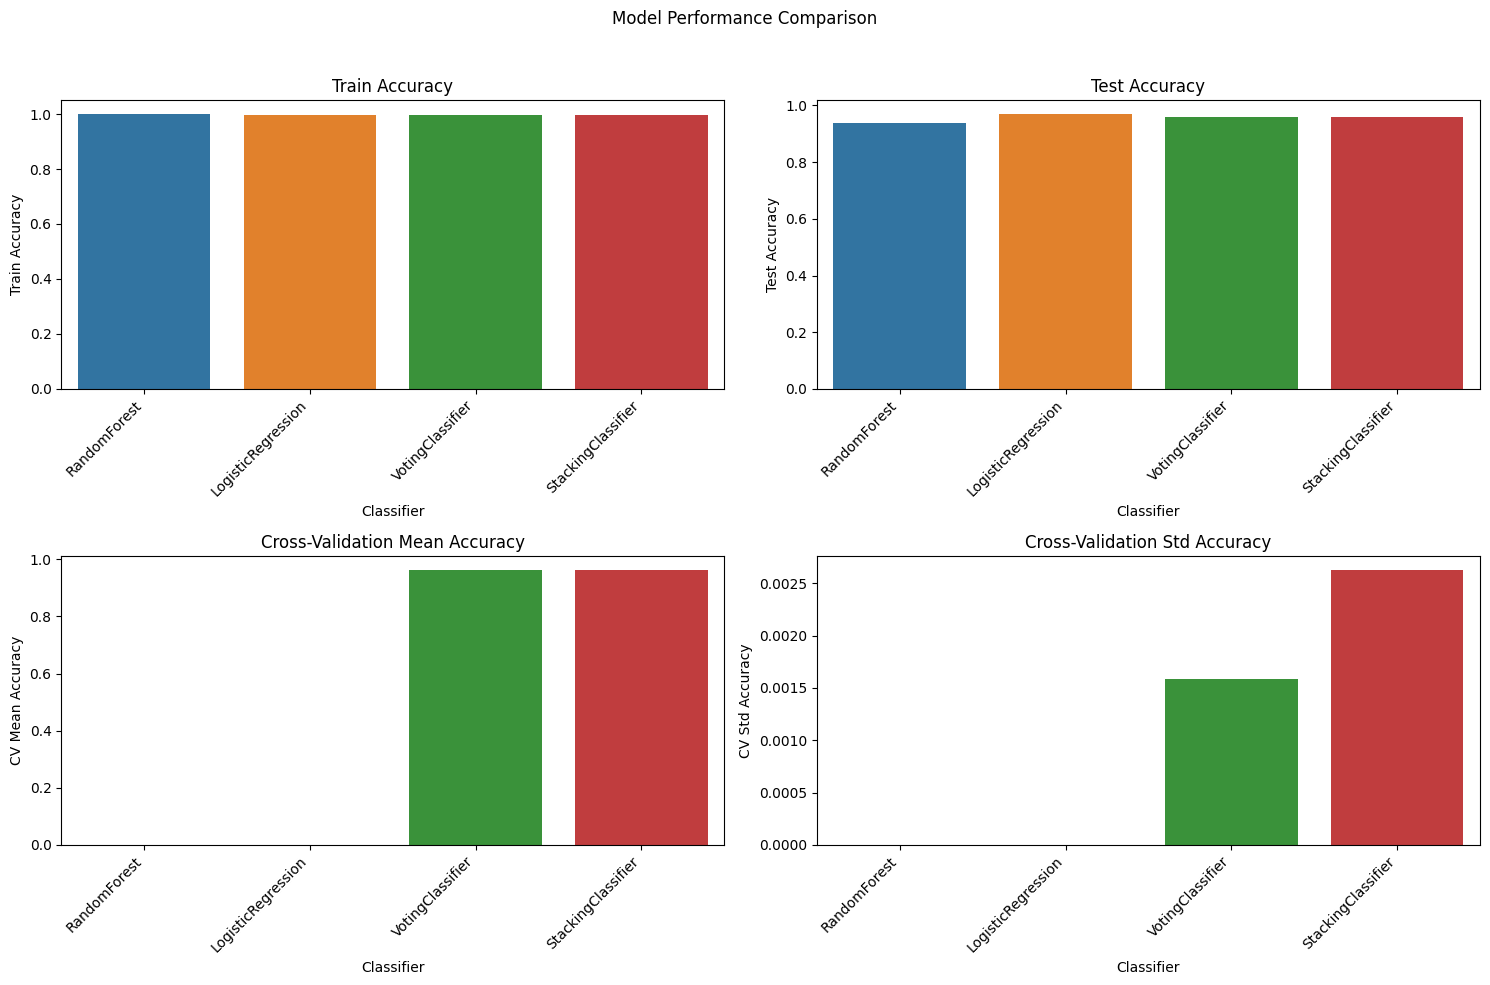

In [62]:
def plot_results(results_df):
    fig, axes = mp.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Model Performance Comparison')

    sn.barplot(ax=axes[0, 0], x='Classifier', y='Train Accuracy', data=results_df)
    axes[0, 0].set_title('Train Accuracy')
    axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')

    sn.barplot(ax=axes[0, 1], x='Classifier', y='Test Accuracy', data=results_df)
    axes[0, 1].set_title('Test Accuracy')
    axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')

    sn.barplot(ax=axes[1, 0], x='Classifier', y='CV Mean Accuracy', data=results_df)
    axes[1, 0].set_title('Cross-Validation Mean Accuracy')
    axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')

    sn.barplot(ax=axes[1, 1], x='Classifier', y='CV Std Accuracy', data=results_df)
    axes[1, 1].set_title('Cross-Validation Std Accuracy')
    axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')

    mp.tight_layout(rect=[0, 0, 1, 0.96])
    mp.show()

plot_results(results_df)


In [69]:
print(f"The best model is: {best_model}")
print(f"With best parameters: {best_params}")
j.dump(best_model, 'best_model.pkl')
j.dump(word_vector,'vectorizer.pkl')


The best model is: LogisticRegression(C=10.0, max_iter=1000)
With best parameters: {'C': 10.0}


['vectorizer.pkl']

# 🗞️ **Fake News Detection** 🔍

## 📋 **Loading the Model and Vectorizer** 🛠️

### 1. **Loading the Saved Model** 📦
- **Model File**: `best_model.pkl`
- **Action**: The previously saved model is loaded into the variable `mdl`.

### 2. **Loading the Vectorizer** 📦
- **Vectorizer File**: `vectorizer.pkl`
- **Action**: The vectorizer used for text transformation is loaded into the variable `vectorizer`.

## 📄 **Text Transformation and Prediction** 🔮

### 1. **Transforming and Predicting Fake News** 📰
- **Text Input**: 
  - "Daniel J Flynn ever get feel life circl roundabout rather head straight line toward intend destin Hillary Clinton remain big woman campu leafi ..."

- **Action**: 
  - The text is transformed using the loaded vectorizer.
  - The transformed text is passed to the model for prediction.
- **Prediction**:
  - **If `prediction == 1`**: "The Given News is Fake" 🛑
  - **Else**: "The Given News is Real" ✅

### 2. **Transforming and Predicting Another News Item** 📰
- **Text Input**: 
  - "Darrell Lucus house dem aide ..."

- **Action**: 
  - The text is transformed using the loaded vectorizer.
  - The transformed text is passed to the model for prediction.
- **Prediction**:
  - **If `prediction == 1`**: "The Given News is Fake" 🛑
  - **Else**: "The Given News is Real" ✅


In [70]:
mdl=j.load('best_model.pkl')
vectorizer=j.load('vectorizer.pkl')


In [74]:
text=vectorizer.transform(['daniel j  flynn ever get feel life circl roundabout rather head straight line toward intend destin hillari clinton remain big woman campu leafi  liber wellesley  massachusett  everywher els vote like inaugur dress remaind day way miss havisham forev wore wed dress speak great expect  hillari rodham overflow 48 year ago first address wellesley graduat class  the presid colleg inform gather 1969 student need  no debat far i could ascertain spokesman be kind like democrat primari 2016 minu term unknown even seven sister school  i glad miss adam made clear i speak today us  400 us miss rodham told classmat  after appoint edger bergen charli mccarthi mortim snerd attend   bespectacl granni glass  award matronli wisdom  least john lennon wisdom  took issu previou speaker  despit becom first win elect seat u  s  senat sinc reconstruct  edward brook came critic call  empathi  goal protestor critic tactic  though clinton senior thesi saul alinski lament  black power demagogu elitist arrog repress intoler  within new left  similar word come republican necessit brief rebutt trust rodham iron observ 1969 thi one word i ask class rehears want say them  everyon came said  talk trust  talk lack trust us way feel other  talk trust bust what say it  what say feel permeat gener perhap even understood distrust the  trust bust  certainli bust clinton s 2016 plan  she certainli even understand peopl distrust her  after whitewat  travelg  vast conspiraci  benghazi  miss email  clinton found distrust voic friday  there load compromis road broaden polit horizon  and distrust american peopl  trump edg 48 percent 38 percent question immedi prior novemb s elect  stood major reason close horizon  clinton describ vanquish support embrac  lie  con  altern fact  a assault truth reason  she fail explain american peopl chose lie truth as histori major among today know well  peopl power invent fact attack question them  mark begin end free societi offer that hyperbol  like mani peopl emerg 1960  hillari clinton embark upon long  strang trip  from high school goldwat girl wellesley colleg republican presid democrat politician  clinton drank time place gave degre  more significantli  went idealist cynic  comparison two wellesley commenc address show  way back when  lament  for long leader view polit art possibl  challeng practic polit art make appear imposs possibl  now  big woman campu odd woman white hous  wonder current station even possibl whi aren t i 50 point ahead ask septemb  in may ask isn t presid  the woman famous dub  congenit liar  bill safir conclud lie  their  mind you  her  get stood elect day  like find jilt bride wed day  inspir danger delus '
])

prediction = mdl.predict(text)
if prediction==1:
    print("The Given News is Fake")
else:
    print("The Given News is Real")    





The Given News is Real


In [75]:
text=vectorizer.transform(['darrell lucus house dem aide  we didn t even see comey s letter until jason chaffetz tweeted it by darrell lucus october 30  2016 subscribe jason chaffetz stump american fork  utah image courtesy michael jolley  available creative commons by license with apologies keith olbermann  doubt worst person the world week fbi director james comey  but according house democratic aide  looks like also know second worst person well  it turns comey sent now infamous letter announcing fbi looking emails may related hillary clinton s email server  ranking democrats relevant committees didn t hear comey  they found via tweet one republican committee chairmen as know  comey notified republican chairmen democratic ranking members house intelligence  judiciary  oversight committees agency reviewing emails recently discovered order see contained classified information  not long letter went out  oversight committee chairman jason chaffetz set political world ablaze tweet  fbi dir informed me the fbi learned existence emails appear pertinent investigation case reopened  jason chaffetz jasoninthehouse  october 28  2016  of course  know case comey actually saying reviewing emails light  an unrelated case  which know anthony weiner s sexting teenager  but apparently little things facts didn t matter chaffetz  the utah republican already vowed initiate raft investigations hillary wins at least two years  worth  possibly entire term s worth them  apparently chaffetz thought fbi already work him resulting tweet briefly roiled nation cooler heads realized dud but according senior house democratic aide  misreading letter may least chaffetz  sins  that aide told shareblue boss democrats didn t even know comey s letter time and found checked twitter democratic ranking members relevant committees didn t receive comey s letter republican chairmen  in fact  democratic ranking members didn  receive chairman oversight government reform committee  jason chaffetz  tweeted made public  so let s see we ve got right  the fbi director tells chaffetz gop committee chairmen major development potentially politically explosive investigation  neither chaffetz colleagues courtesy let democratic counterparts know it  instead  according aide  made find twitter there already talk daily kos comey provided advance notice letter chaffetz republicans  giving time turn spin machine  that may make good theater  nothing far even suggests case  after all  nothing far suggests comey anything grossly incompetent tone deaf what suggest  however  chaffetz acting way makes dan burton darrell issa look like models responsibility bipartisanship  he didn t even decency notify ranking member elijah cummings something explosive  if doesn t trample basic standards fairness  i don t know does granted  it s likely chaffetz answer this  he sits ridiculously republican district anchored provo orem  cook partisan voting index r 25  gave mitt romney punishing 78 percent vote 2012  moreover  republican house leadership given full support chaffetz  planned fishing expedition  but doesn t mean can t turn hot lights him  after all  textbook example house become republican control  and also second worst person world  about darrell lucus  darrell 30 something graduate university north carolina considers journalist old school  an attempt turn member religious right college succeeded turning religious right s worst nightmare  a charismatic christian unapologetic liberal  his desire stand scared silence increased survived abusive three year marriage  you may know daily kos christian dem nc follow twitter  darrelllucus connect facebook click buy darrell mello yello  connect'

])

prediction = mdl.predict(text)
if prediction==1:
    print("The Given News is Fake")
else:
    print("The Given News is Real")    





The Given News is Fake


# 🎉 **Conclusion & Next Steps** 🚀

## 🎯 **Conclusion** 🌟

Throughout this notebook, we have: 

1. **📊 Built and Evaluated a Fake News Detection Model**: 
   - Used TF-IDF Vectorization and XGBoost Classifier for model training.
   - Evaluated the model using accuracy, precision, and compared with other classifiers.
   - Successfully identified the best model and its parameters.

2. **🔍 Conducted Model Predictions**:
   - Tested the model on different news texts to classify them as Fake or Real.
   - Demonstrated how to load a pre-trained model and vectorizer for new predictions.

## 🚀 **Suggestions for Further Improvement** 🔧

1. **📈 Explore Additional Models**:
   - Consider trying other models like BERT or other advanced NLP techniques to improve accuracy and robustness.
   - Experiment with ensemble methods or deep learning approaches for better performance.

2. **🧹 Enhance Data Preprocessing**:
   - Investigate more sophisticated text preprocessing techniques like stemming or lemmatization.
   - Try different n-grams (bigrams, trigrams) to capture more context from the text.

3. **🌍 Expand Dataset**:
   - Collect and include more diverse and up-to-date news data for training.
   - Explore incorporating external datasets to generalize the model better.

4. **💬 Add User Interaction Features**:
   - Build a web application where users can input their own news texts and get real-time predictions.
   - Implement a feedback system to continuously improve the model based on user inputs.

5. **📊 Perform Model Optimization**:
   - Fine-tune hyperparameters more extensively using techniques like RandomizedSearchCV or Bayesian Optimization.
   - Implement cross-validation to ensure the model generalizes well across different datasets.

6. **🔍 Visualize Model Performance**:
   - Create visualizations to show model performance metrics, confusion matrices, and feature importance.
   - Develop dashboards for easy monitoring and comparison of model results.

## 🙏 **Thank You for Visiting This Notebook!** 🎉

We appreciate your time and hope this notebook has been insightful and useful. If you have any questions or feedback, feel free to reach out. Happy analyzing! 😊

# 🌟 **Keep Exploring and Learning!** 🌟
